<a href="https://colab.research.google.com/github/forexms78/AI-05-/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EB%B3%B8%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 세팅
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,647 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126371 files and dire

# 머신러닝 기본기

기울기 w: 0.3570
절편 b: 0.1068
평균 제곱 오차 (MSE): 0.1022


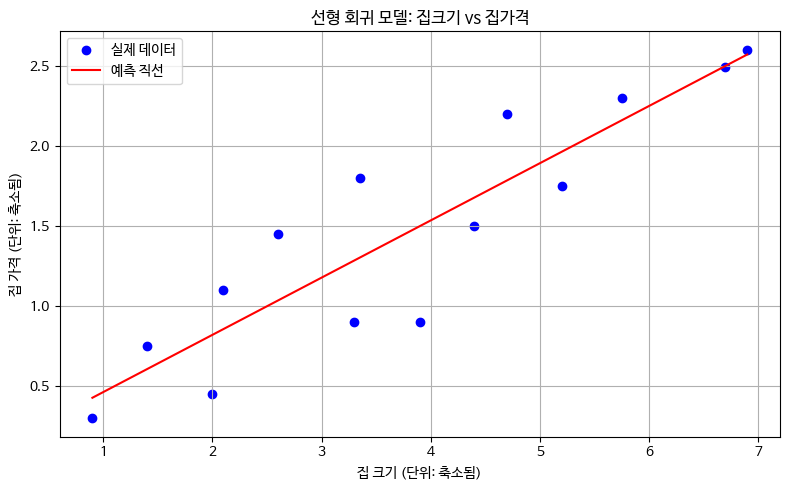

In [5]:
# 실습1 문제 코드 - 선형 회귀 + MSE
import numpy as np

# 입력 변수 (집크기)와 출력 변수 (집 가격)
h_size = np.array([0.9, 1.4, 2, 2.1, 2.6, 3.3, 3.35, 3.9, 4.4, 4.7, 5.2, 5.75, 6.7, 6.9])
h_price = np.array([0.3, 0.75, 0.45, 1.1, 1.45, 0.9, 1.8, 0.9, 1.5, 2.2, 1.75, 2.3, 2.49, 2.6])

# 1. 선형 회귀 수식 구하기
# 곡선이나 직선찾기 (함수의인자 1, 2, degree 몇 차 함수인지?)
w, b = np.polyfit(h_size, h_price, 1)

# 2. 예측값 계산
predicted_price = w * h_size + b

# 3. MSE 계산
mse = np.mean((h_price - predicted_price) ** 2)

# 결과 출력
print(f"기울기 w: {w:.4f}")
print(f"절편 b: {b:.4f}")
print(f"평균 제곱 오차 (MSE): {mse:.4f}")

# 시작화
plt.figure(figsize=(8,5))
plt.scatter(h_size, h_price, color="blue", label="실제 데이터")
plt.plot(h_size, predicted_price, color="red", label="예측 직선")
plt.title("선형 회귀 모델: 집크기 vs 집가격")
plt.xlabel("집 크기 (단위: 축소됨)")
plt.ylabel("집 가격 (단위: 축소됨)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
# 실습2 문제 코드 - 기울기 하강법으로 선형 회귀 실습
# 초기 파라미터
w = 0.0
b = 0.0
lr = 0.01       # 학습률 (learning rate)
epochs = 1000   # 반복 횟수 => MD/DL에서 최적화할 때 변경하는 수치
n = len(h_size)

# 비용 추적 리스트
cost_list = []

# 경사 하강법
for epochs in range(epochs):
  y_pred = w * h_size + b
  error = y_pred - h_size

  dw =(2/n) * np.dot(error, h_size)
  db = (2/n) * error.sum()

  w -= lr * dw
  b -= lr * db

  mse = np.mean(error ** 2)
  cost_list.append(mse)

# 최종 결과 출력
print(f"학습 완료! 기울기 w={w:.4f}, 절편 b = {b:.4f}")
print(f"최종 MSE: {mse:.4f}")


학습 완료! 기울기 w=0.9988, 절편 b = 0.0055
최종 MSE: 0.0000
학습 완료! 기울기 w = 0.9988, 절편 b = 0.0055
최종 MSE: 0.0000
